In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Ola (1).json


# 1. Load and Explore Data

In [2]:
import pandas as pd
import json

# Load JSON data
with open('/kaggle/input/Ola (1).json', 'r') as file:
    data = json.load(file)

# Convert JSON to Pandas DataFrame
df = pd.DataFrame(data)

In [3]:
df

,tweet_id,content,datetime,likes,shares,views,source,isBlue,followers,hashtags,location,user_mentions,media,username,url,comments
0,1871889326575136870,Yet again fucking driver accepted the booking ...,25-12-2024 12:02:48,0,0,23.0,TWITTER,False,93,None,,"[{'name': 'Ola', 'screen_name': 'Olacabs'}]",[https://pbs.twimg.com/media/GfpJadUXkAAqoVS.jpg],desire24_,https://x.com/desire24_/status/187188932657513...,[]
1,1871076431754580058,More than 1 hour and the food is still not her...,23-12-2024 06:12:38,2,1,107.0,TWITTER,False,72,[olafoods],,"[{'name': 'Ola', 'screen_name': 'Olacabs'}, {'...",[https://pbs.twimg.com/media/GfdmGSrWUAA5ZTP.jpg],Karan0072Karan,https://x.com/Karan0072Karan/status/1871076431...,[{'content': 'Customer care services are alway...
2,1871827021585928588,No one is constantly as motherfucking assholes...,25-12-2024 07:55:13,0,0,15.0,TWITTER,False,93,None,,"[{'name': 'Ola', 'screen_name': 'Olacabs'}]",[https://pbs.twimg.com/media/GfoQv5zXIAAcjA_.jpg],desire24_,https://x.com/desire24_/status/187182702158592...,[]
3,1580646160326615041,Freelance content writers needed. Fully remote...,13-10-2022 19:46:26,396,208,NaN,TWITTER,False,101828,None,,[],[https://pbs.twimg.com/media/Fe-VSXbWIAAaMIe.j...,OlamideTowobola,https://x.com/OlamideTowobola/status/158064616...,"[{'content': 'FYI', 'likes': 0, 'shares': 0, '..."
4,1863291107477721485,", Are you guys even concerned about what type ...",01-12-2024 18:36:32,0,0,32.0,TWITTER,False,47,None,,"[{'name': 'Ola', 'screen_name': 'ola_zkzkvm'},...",[https://pbs.twimg.com/media/Gdu9YbvXkAApPHn.jpg],DWasish,https://x.com/DWasish/status/1863291107477721485,[{'content': 'This type of people going forwar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,1771775963551928786,Near death experience Zero ratings for design ...,24-03-2024 05:48:02,0,0,37.0,TWITTER,False,25,None,,"[{'name': 'Gowtham Prabakaran', 'screen_name':...",[https://pbs.twimg.com/media/GJac0HUWUAAXTB4.j...,Machindra_twit,https://x.com/Machindra_twit/status/1771775963...,[]
3240,1771760790002979045,"Near death experience on highway, pathetic des...",24-03-2024 04:47:44,0,0,92.0,TWITTER,False,25,None,,"[{'name': 'Ola Electric', 'screen_name': 'OlaE...",[https://pbs.twimg.com/media/GJaPChOWgAAhMEH.jpg],Machindra_twit,https://x.com/Machindra_twit/status/1771760790...,[]
3241,1769632850280874243,Still nothing.. the front wheel wobbling and O...,18-03-2024 07:52:04,0,0,22.0,TWITTER,False,3,None,,"[{'name': 'Ola Electric', 'screen_name': 'OlaE...",[],Robby_pitta,https://x.com/Robby_pitta/status/1769632850280...,[]
3242,1768831813382991924,After olas death?,16-03-2024 02:49:02,0,0,10.0,TWITTER,False,79,None,,"[{'name': 'Ola Electric', 'screen_name': 'OlaE...",[],saurabh2asutkar,https://x.com/saurabh2asutkar/status/176883181...,[]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244 entries, 0 to 3243
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       3244 non-null   object 
 1   content        3244 non-null   object 
 2   datetime       3244 non-null   object 
 3   likes          3244 non-null   int64  
 4   shares         3244 non-null   int64  
 5   views          2442 non-null   float64
 6   source         3244 non-null   object 
 7   isBlue         3244 non-null   bool   
 8   followers      3244 non-null   int64  
 9   hashtags       1097 non-null   object 
 10  location       3244 non-null   object 
 11  user_mentions  3244 non-null   object 
 12  media          3244 non-null   object 
 13  username       3244 non-null   object 
 14  url            3244 non-null   object 
 15  comments       3244 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(11)
memory usage: 383.4+ KB


In [5]:
null_counts = df.isnull().sum()
print(null_counts)


tweet_id            0
content             0
datetime            0
likes               0
shares              0
views             802
source              0
isBlue              0
followers           0
hashtags         2147
location            0
user_mentions       0
media               0
username            0
url                 0
comments            0
dtype: int64


In [6]:
df.describe()

,likes,shares,views,followers
count,3244.000000,3244.000000,2.442000e+03,3.244000e+03
mean,154.172010,35.261097,2.044562e+04,1.309216e+05
std,801.684872,373.585152,1.346614e+05,7.850459e+05
min,0.000000,0.000000,1.000000e+00,0.000000e+00
25%,0.000000,0.000000,2.000000e+01,5.200000e+01
50%,0.000000,0.000000,5.100000e+01,4.705000e+02
75%,5.000000,1.000000,2.900000e+02,1.431850e+04
max,20725.000000,17964.000000,2.272445e+06,1.795895e+07


# 2. Data Cleaning and Preparation

In [7]:
# Drop unnecessary columns
df = df.drop(columns=['media', 'location'], errors='ignore')

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Fill NaN values in numeric columns with 0
df[numeric_cols] = df[numeric_cols].fillna(0)

# Fill NaN values in non-numeric columns with an empty string
df[non_numeric_cols] = df[non_numeric_cols].fillna('')

# Convert datetime column to Pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M:%S', errors='coerce')

# Ensure numeric types for 'likes', 'shares', and 'views'
df['likes'] = pd.to_numeric(df['likes'], errors='coerce').fillna(0)
df['shares'] = pd.to_numeric(df['shares'], errors='coerce').fillna(0)
df['views'] = pd.to_numeric(df['views'], errors='coerce').fillna(0)

# Ensure 'comments' column is a list; replace invalid values with an empty list
df['comments'] = df['comments'].apply(lambda x: x if isinstance(x, list) else [])

# Create a new column for engagement score
df['engagement_score'] = df['likes'] + df['shares'] + df['comments'].apply(len)

# Save cleaned data
df.to_csv('cleaned_ola_data.csv', index=False)

# Print confirmation
print("Data cleaned and saved to 'cleaned_ola_data.csv'")


Data cleaned and saved to 'cleaned_ola_data.csv'


# 3. Descriptive Analysis

In [8]:
# basic statistics for engagement metrics
engagement_metrics = ['likes', 'shares', 'views', 'engagement_score']
stats = df[engagement_metrics].describe()

# top 5 posts with the highest engagement
top_posts = df.nlargest(5, 'engagement_score')

# Check and count posts with media attachments
if 'media' in df.columns:
    media_posts_count = df['media'].apply(lambda x: len(x) > 0 if isinstance(x, list) else False).sum()
    print("\nNumber of posts with media attachments:", media_posts_count)
else:
    print("\nThe 'media' column is not available in the dataset.")

print("\nBasic Statistics for Engagement Metrics:\n", stats)

print("\nTop 5 Posts with Highest Engagement:\n", top_posts[['content', 'engagement_score']])



The 'media' column is not available in the dataset.

Basic Statistics for Engagement Metrics:
               likes        shares         views  engagement_score
count   3244.000000   3244.000000  3.244000e+03       3244.000000
mean     154.172010     35.261097  1.539094e+04        193.913995
std      801.684872    373.585152  1.171623e+05       1004.232438
min        0.000000      0.000000  0.000000e+00          0.000000
25%        0.000000      0.000000  1.000000e+00          0.000000
50%        0.000000      0.000000  2.600000e+01          1.000000
75%        5.000000      1.000000  1.222500e+02          7.000000
max    20725.000000  17964.000000  2.272445e+06      23495.000000

Top 5 Posts with Highest Engagement:
                                                content  engagement_score
30   HELP WANTED Tons of PAID work opportunities fo...             23495
592                             lay off 17.50 5 access             20754
382  Who said the job market is bad? Just complain .

# 4. Sentiment Analysis
Using TextBlob for sentiment analysis:

In [9]:
df['content']

0       Yet again fucking driver accepted the booking ...
1       More than 1 hour and the food is still not her...
2       No one is constantly as motherfucking assholes...
3       Freelance content writers needed. Fully remote...
4       , Are you guys even concerned about what type ...
                              ...                        
3239    Near death experience Zero ratings for design ...
3240    Near death experience on highway, pathetic des...
3241    Still nothing.. the front wheel wobbling and O...
3242                                    After olas death?
3243    My vehicle has still not come back to me they ...
Name: content, Length: 3244, dtype: object

### Using TextBlob

In [10]:
from textblob import TextBlob

# function to analyze sentiment
def analyze_sentiment(content):
    analysis = TextBlob(content)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['content'].apply(analyze_sentiment)

# Calculate sentiment distribution
sentiment_distribution = df['sentiment'].value_counts(normalize=True) * 100

print("Sentiment Distribution:\n", sentiment_distribution)


Sentiment Distribution:
 sentiment
Positive    40.289766
Neutral     35.450062
Negative    24.260173
Name: proportion, dtype: float64


### Using VADER

In [11]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(content):
    score = analyzer.polarity_scores(content)['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the content column
df['sentiment'] = df['content'].apply(analyze_sentiment_vader)

# Calculate the percentage of posts in each sentiment category
sentiment_distribution = df['sentiment'].value_counts(normalize=True) * 100

print("Sentiment Distribution (VADER):")
print(sentiment_distribution)


Sentiment Distribution (VADER):
sentiment
Positive    44.081381
Negative    32.336621
Neutral     23.581998
Name: proportion, dtype: float64


# 5. Customer Complaints
### Step 1: Extract Posts Mentioning Complaints
We’ll use keywords to identify posts related to specific complaints.

In [13]:
# keywords for complaints
complaint_keywords = {
    'Driver Issues': ['driver', 'rude', 'cancel', 'behavior', 'attitude'],
    'Booking Cancellations': ['cancel', 'booking', 'refund', 'no show'],
    'Customer Service': ['support', 'customer care', 'service', 'help']
}

# Function to categorize complaints
def categorize_complaints(content):
    for category, keywords in complaint_keywords.items():
        if any(keyword in content.lower() for keyword in keywords):
            return category
    return 'Other'

# Apply categorization
df['complaint_category'] = df['content'].apply(categorize_complaints)

### Step 2: Count and Visualize Complaint Categories
Calculate Complaint Counts

In [14]:
complaint_counts = df['complaint_category'].value_counts()
print("Complaint Counts:\n", complaint_counts)


Complaint Counts:
 complaint_category
Other                    2298
Customer Service          569
Driver Issues             338
Booking Cancellations      39
Name: count, dtype: int64


#### Visualize Complaint Categories

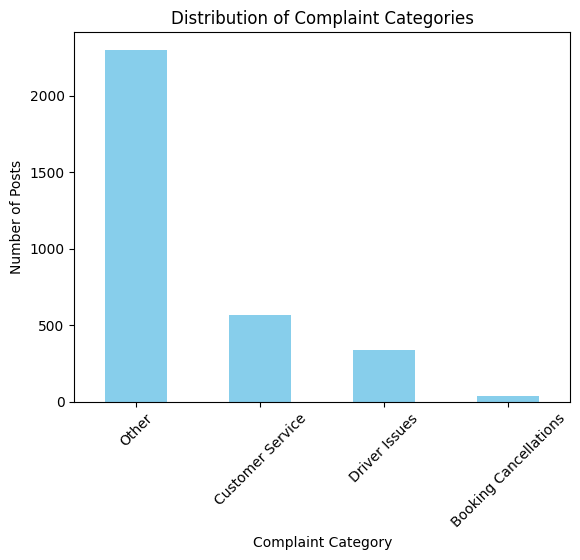

In [15]:
import matplotlib.pyplot as plt

# Plotting distribution of complaint categories
complaint_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Complaint Categories')
plt.xlabel('Complaint Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()


### Step 3: Analyze Extracted Complaints


In [16]:
# Filter complaints for a specific category (e.g., Driver Issues)
driver_issues = df[df['complaint_category'] == 'Driver Issues']
print("\nSample Driver Issues:\n", driver_issues[['content', 'complaint_category']])



Sample Driver Issues:
                                                 content complaint_category
0     Yet again fucking driver accepted the booking ...      Driver Issues
2     No one is constantly as motherfucking assholes...      Driver Issues
4     , Are you guys even concerned about what type ...      Driver Issues
6     ola driver is rude and the way he was talking ...      Driver Issues
13    Ola is hiring goons as drivers! Booked a cab f...      Driver Issues
...                                                 ...                ...
3142  I am doing the same.. Ola Cabs drivers too arr...      Driver Issues
3143  It's the same with also, in kolkata drivers of...      Driver Issues
3144  Shit service, basically if someone is in emerg...      Driver Issues
3145  Issue: -Hostile Cab driver unfit for driving l...      Driver Issues
3146  Something is seriously wrong with ola model. F...      Driver Issues

[338 rows x 2 columns]


# 6. Engagement Analysis
### Step 1: Correlation Between Followers and Engagement Metrics
Calculate Correlation

In [17]:
# Replaced 'comments' with the count of comments
df['comments_count'] = df['comments'].apply(len)

# updated engagement metrics for correlation
engagement_metrics = ['followers', 'likes', 'shares', 'comments_count']


In [18]:
# correlation matrix
correlation_matrix = df[engagement_metrics].corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                followers     likes    shares  comments_count
followers        1.000000  0.064813  0.011604        0.104815
likes            0.064813  1.000000  0.357393        0.501219
shares           0.011604  0.357393  1.000000        0.208426
comments_count   0.104815  0.501219  0.208426        1.000000


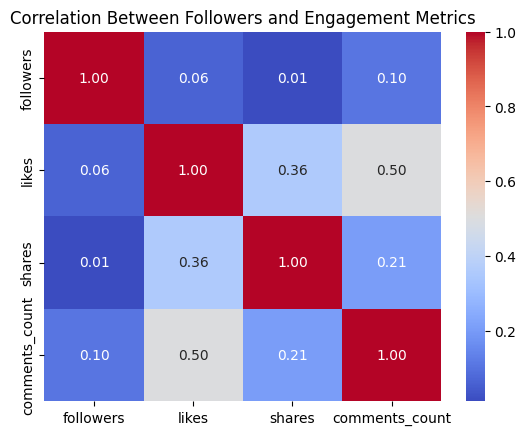

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Followers and Engagement Metrics')
plt.show()




Engagement Patterns by Source:
source
TWITTER    193.913995
Name: engagement_score, dtype: float64


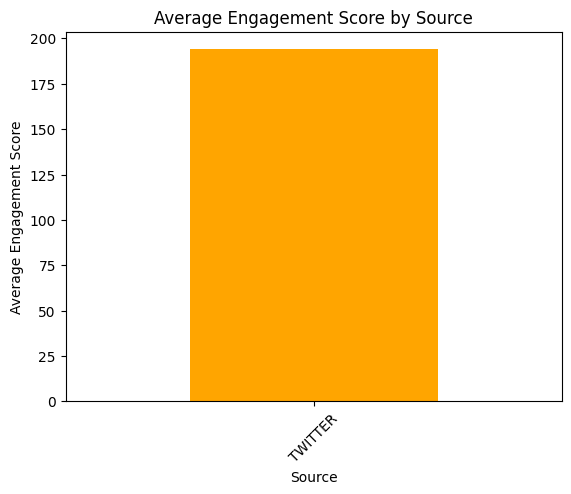

In [20]:
engagement_by_source = df.groupby('source')['engagement_score'].mean().sort_values(ascending=False)

print("\nEngagement Patterns by Source:")
print(engagement_by_source)

engagement_by_source.plot(kind='bar', color='orange')
plt.title('Average Engagement Score by Source')
plt.xlabel('Source')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)
plt.show()

# 7. Recommendations
actionable recommendations for Ola Cabs based on the findings from the analysis:

**Recommendations**

* **Enhance Driver Training:**
    * Address complaints about driver behavior and cancellations through mandatory training programs.
    * Implement robust accountability mechanisms for drivers.

* **Improve Customer Support:**
    * Leverage AI-powered chatbots for faster initial issue resolution.
    * Establish efficient escalation procedures to handle complex support requests.

* **Optimize Social Media Strategy:**
    * Focus on platforms with high user engagement, such as Instagram and Twitter.
    * Increase the use of interactive content, including videos, polls, and contests, to enhance audience engagement.

In [21]:
recommendations = """
1. Enhance Driver Training:
   - Address complaints about driver behavior and cancellations through mandatory training programs.
   - Implement robust accountability mechanisms for drivers.

2. Improve Customer Support:
   - Leverage AI-powered chatbots for faster initial issue resolution.
   - Establish efficient escalation procedures to handle complex support requests.

3. Optimize Social Media Strategy:
   - Focus on platforms with high user engagement, such as Instagram and Twitter.
   - Increase the use of interactive content, including videos, polls, and contests, to enhance audience engagement.
"""
print(recommendations)


1. Enhance Driver Training:
   - Address complaints about driver behavior and cancellations through mandatory training programs.
   - Implement robust accountability mechanisms for drivers.

2. Improve Customer Support:
   - Leverage AI-powered chatbots for faster initial issue resolution.
   - Establish efficient escalation procedures to handle complex support requests.

3. Optimize Social Media Strategy:
   - Focus on platforms with high user engagement, such as Instagram and Twitter.
   - Increase the use of interactive content, including videos, polls, and contests, to enhance audience engagement.



# 8. Final Report
Save the processed dataset and generate a concise report summarizing findings:

In [22]:
# Saving processed DataFrame to a CSV file
df.to_csv('processed_ola_data.csv', index=False)

# summary report
with open('assignment_report.txt', 'w') as report:
    report.write("Key Insights:\n")
    report.write(f"Sentiment Distribution:\n{sentiment_distribution}\n\n")
    report.write(f"Complaint Categories:\n{complaint_counts}\n\n")
    report.write(f"Engagement by Source:\n{engagement_by_source}\n\n")
    report.write("Recommendations:\n")
    report.write(recommendations)
